In [1]:
#To set the tensorflow version
%tensorflow_version 1.x
# visualize feature maps output of vgg
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

TensorFlow 1.x selected.


Using TensorFlow backend.


**Visualizing the input**

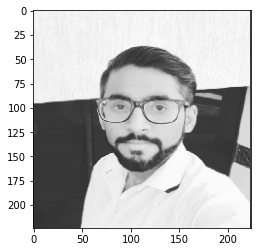

In [23]:
#Specify image path here
imagePath='/content/TestVis.png'
#Load image
img = load_img(imagePath, target_size=(224, 224))
#plotting image
pyplot.imshow(img)


**VGG-16 Model visualization**

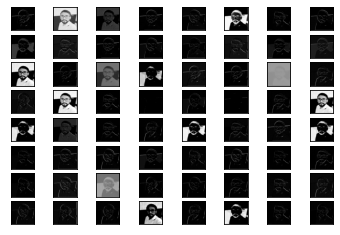

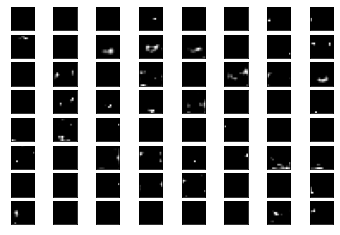

In [24]:
#model initialization
model = VGG16()

#Selecting layers to get their output
layers = [1,17]
# layers = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in layers]

#Initializing model with set of layers which we want to visualize
model = Model(inputs=model.inputs, outputs=outputs)

#Converting image to pixel array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

#preprocesses the image according to VGG
img = preprocess_input(img)

#Gets feature maps
feature_maps = model.predict(img)

# plot the output from each block

square = 8
for fmap in feature_maps:

	ix = 1
	for _ in range(square):
   
		for _ in range(square):
    
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1

	pyplot.show()

**Visualizing ResNet-50**

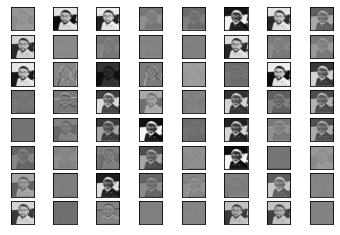

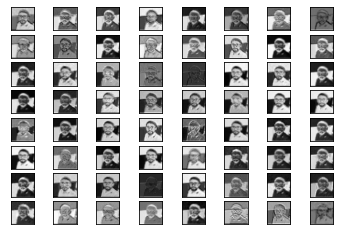

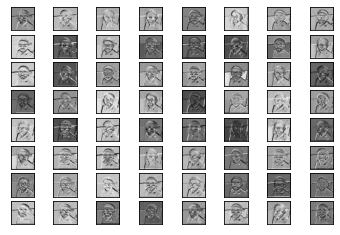

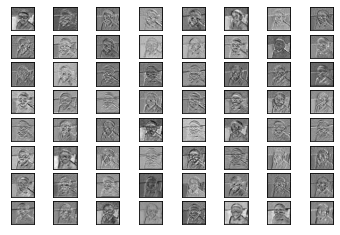

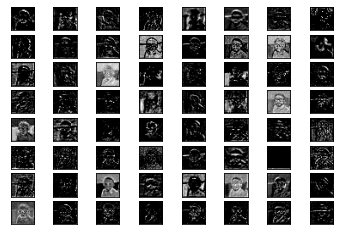

In [25]:
from keras.applications.resnet50 import ResNet50

#model initialization
model = ResNet50(weights='imagenet')

#Selecting layers to get their output

layers = [2, 15, 19, 23, 50]
# layers = [2, 5, 9, 13, 50]
outputs = [model.layers[i].output for i in layers]

#Initializing model with set of layers which we want to visualize
model = Model(inputs=model.inputs, outputs=outputs)

#Gets feature maps
feature_maps = model.predict(img)

# plot the output from each block

square = 8
for fmap in feature_maps:

	ix = 1
	for _ in range(square):
   
		for _ in range(square):
    
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			# pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1

	pyplot.show()

Reference:
* "https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/"


